## YES BANK TRANSACTION STATEMENT

In [210]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import time
from datetime import datetime
nltk.download('stopwords')
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
# convert pdf to csv file by using tabula
!pip install tabula-py

In [212]:
# Import the required Module
import tabula
# Read a PDF File
df = tabula.read_pdf("/content/yes02.pdf", pages='all')[0]
# convert PDF into CSV
tabula.convert_into("/content/yes02.pdf", "/content/yes02.csv", output_format="csv", pages='all')

Got stderr: Jul 29, 2021 8:20:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jul 29, 2021 8:20:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jul 29, 2021 8:20:24 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace
Jul 29, 2021 8:20:25 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace

Got stderr: Jul 29, 2021 8:20:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jul 29, 2021 8:20:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jul 29, 2021 8:20:29 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace
Jul 29, 2021 8:20:30 AM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased fallbackToAlternateColorSpace



In [213]:
#little bit modification manually and importing my csv files.
import csv
with open('yes bank.csv') as input, open('yesbank.csv', 'w', newline='') as output:
     writer = csv.writer(output)
     for row in csv.reader(input):
         if any(field.strip() for field in row):
             writer.writerow(row)

In [214]:
df = pd.read_csv('/content/yesbank.csv')
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,01-04-2019,02-04-2019,NEFT-N091190217874982-100017591084-SANGEET A RANI,"50,000.00",0,"-,17,98,060.46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-04-2019,02-04-2019,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0,"10,195.00","-,17,87,865.46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-04-2019,03-04-2019,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,"43,362.00",0,"-,18,31,227.46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03-04-2019,03-04-2019,NET TXN: IB FUNDS TRANS 010663300000800,"44,781.00",0,"-,18,76,008.46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03-04-2019,03-04-2019,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,"1,947.00",0,"-,18,77,955.46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
# removing unnamed columns
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance
0,01-04-2019,02-04-2019,NEFT-N091190217874982-100017591084-SANGEET A RANI,"50,000.00",0,"-,17,98,060.46"
1,02-04-2019,02-04-2019,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0,"10,195.00","-,17,87,865.46"
2,03-04-2019,03-04-2019,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,"43,362.00",0,"-,18,31,227.46"
3,03-04-2019,03-04-2019,NET TXN: IB FUNDS TRANS 010663300000800,"44,781.00",0,"-,18,76,008.46"
4,03-04-2019,03-04-2019,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,"1,947.00",0,"-,18,77,955.46"


## EDA AND DATA CLEANING

In [216]:
df.shape

(179, 6)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction Date  179 non-null    object
 1   Value Date        179 non-null    object
 2   Description       179 non-null    object
 3   Withdrawal        179 non-null    object
 4   Deposit           179 non-null    object
 5   Balance           179 non-null    object
dtypes: object(6)
memory usage: 8.5+ KB


In [218]:
df.isnull().sum()

Transaction Date    0
Value Date          0
Description         0
Withdrawal          0
Deposit             0
Balance             0
dtype: int64

In [219]:
# lot of cleaning needed in balance, withdrawal, and deposit
df["Balance"] = df["Balance"].str.replace("-,", '')
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance
0,01-04-2019,02-04-2019,NEFT-N091190217874982-100017591084-SANGEET A RANI,"50,000.00",0,"17,98,060.46"
1,02-04-2019,02-04-2019,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0,"10,195.00","17,87,865.46"
2,03-04-2019,03-04-2019,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,"43,362.00",0,"18,31,227.46"
3,03-04-2019,03-04-2019,NET TXN: IB FUNDS TRANS 010663300000800,"44,781.00",0,"18,76,008.46"
4,03-04-2019,03-04-2019,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,"1,947.00",0,"18,77,955.46"


In [220]:
df["Withdrawal"] = df["Withdrawal"].apply(lambda x: str(x).replace(",", ""))
df["Deposit"]= df["Deposit"].apply(lambda x: x.replace(",", ""))
df["Balance"] = df["Balance"].apply(lambda x: x.replace(",", ""))

In [221]:
 df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
 df["Value Date"] = pd.to_datetime(df["Value Date"])
 df["Withdrawal"] = pd.to_numeric(df["Withdrawal"])
 df["Deposit"] = pd.to_numeric(df["Deposit"])
 df["Balance"] = pd.to_numeric(df["Balance"])

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  179 non-null    datetime64[ns]
 1   Value Date        179 non-null    datetime64[ns]
 2   Description       179 non-null    object        
 3   Withdrawal        179 non-null    float64       
 4   Deposit           179 non-null    float64       
 5   Balance           179 non-null    float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 8.5+ KB


In [223]:
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance
0,2019-01-04,2019-02-04,NEFT-N091190217874982-100017591084-SANGEET A RANI,50000.0,0.0,1798060.46
1,2019-02-04,2019-02-04,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0.0,10195.0,1787865.46
2,2019-03-04,2019-03-04,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,43362.0,0.0,1831227.46
3,2019-03-04,2019-03-04,NET TXN: IB FUNDS TRANS 010663300000800,44781.0,0.0,1876008.46
4,2019-03-04,2019-03-04,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,1947.0,0.0,1877955.46


##Takes the transactions and classifies them into categories
   ### 1. IMPS
   ### 2. ATM
   ### 3. NEFT
   ### 4. NET TXN
   ### 5. CASH and others

###To do: Make it less complicated and reusable
    

In [224]:
t = df["Description"]
t = t.apply(lambda x: x.lower())

In [225]:
# Removing numbers and special characters
text = t.replace(to_replace="[0-9]", value="", regex=True).apply(lambda x: x.replace("/", "").replace("\\", "").replace(":", "").replace("\n", " ").replace("-", " ")
        .replace("/", " "))


In [226]:
for i in range(len(text)):
  x = text[i].split()
  for j in range(len(x)):
    x[j] = x[j].strip()
  text[i] = " ".join(x)

In [227]:
text

0                                                           neft n sangeet a rani
1                        neft cr hdfc ppap automotive ltd asian packaging india n
2                                                neft n galaxy polypack pvt. ltd.
3                                                          net txn ib funds trans
4                                                         neft n amit electricals
5                                                           chq deposit delhi sbi
6                                                           chq deposit delhi bob
7                                              neft n eden high field enterprises
8                                                          net txn ib funds trans
9                           neft cr orbc sagar polymers asian packaging india saa
10     neft cr utib peachtree seatings private limited asian packaging india axtb
11                                                 neft n suman poly pack company
12              

In [228]:
def classify_trans(df):
    
    # df = pd.read_excel("all_bank.xlsx")
    t = df["Description"]

    t = t.apply(lambda x: x.lower())

    # Removing numbers and special characters
    text = t.replace(to_replace="[0-9]", value="", regex=True).apply(
        lambda x: x.replace("/", "").replace("\\", "").replace(":", "").replace("\n", " ").replace("-", " ")
        .replace("/", " "))

    # Removing extra spaces created due to the above step
    for i in range(len(text)):
        x = text[i].split()
        for j in range(len(x)):
            x[j] = x[j].strip()
        text[i] = " ".join(x)

    #### TODO: Rewriting the dictionary in a better implementation

    labels = {"imps": "imps", "rrn": "imps", "loan": "loan", "emi": "emi", 
              "txn paytm": "trf", "paytm": "trf", "gst" : "tax",               
              "atd": "atm", "atm": "atm", "net txn": "nettxn", "cash": "cash", "funds trf": "trf", "neft": "neft",
              "interest": "interest", "chq retn" : "cheque", "cheque deposit" : "cheque", "chq deposit" : "cheque", 
              "upi": "trf", "chq paid" : "cheque",
              "refund": "refund",
              "charge": "bank_charges", "pca": "trf"}

    labs = []

    # Labelling the transaction according to the dictionary defined
    for i in text:
        f = 0
        for j in list(labels.keys()):
            if j in i:
                labs.append(labels[j])
                f = 1
                break
        if f == 0:
            labs.append("miscellaneous")
    df["Label"] = pd.DataFrame(labs)

    return (df)



In [229]:
classify_trans(df)
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance,Label
0,2019-01-04,2019-02-04,NEFT-N091190217874982-100017591084-SANGEET A RANI,50000.0,0.0,1798060.46,neft
1,2019-02-04,2019-02-04,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0.0,10195.0,1787865.46,neft
2,2019-03-04,2019-03-04,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,43362.0,0.0,1831227.46,neft
3,2019-03-04,2019-03-04,NET TXN: IB FUNDS TRANS 010663300000800,44781.0,0.0,1876008.46,nettxn
4,2019-03-04,2019-03-04,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,1947.0,0.0,1877955.46,neft


In [230]:
def money(df):
    type = []
    for i in df.index:
        if df["Withdrawal"][i] > 0:
            type.append("Debit")
        else:
            type.append("Credit")
    df["Type"] = pd.DataFrame(type)
    return (df)

In [231]:
money(df)
df.head()

,Transaction Date,Value Date,Description,Withdrawal,Deposit,Balance,Label,Type
0,2019-01-04,2019-02-04,NEFT-N091190217874982-100017591084-SANGEET A RANI,50000.0,0.0,1798060.46,neft,Debit
1,2019-02-04,2019-02-04,NEFT Cr-HDFC0000240-PPAP AUTOMOTIVE LTD-ASIAN PACKAGING INDIA-N092190791349948,0.0,10195.0,1787865.46,neft,Credit
2,2019-03-04,2019-03-04,NEFT-N093190219086535-100017630729-GALAXY POLYPACK PVT. LTD.,43362.0,0.0,1831227.46,neft,Debit
3,2019-03-04,2019-03-04,NET TXN: IB FUNDS TRANS 010663300000800,44781.0,0.0,1876008.46,nettxn,Debit
4,2019-03-04,2019-03-04,NEFT-N093190219090808-100017630955-AMIT ELECTRICALS,1947.0,0.0,1877955.46,neft,Debit


In [232]:
df['Label'].value_counts()

neft             89
nettxn           41
cheque           28
miscellaneous     6
imps              4
interest          4
trf               4
tax               2
cash              1
Name: Label, dtype: int64

In [234]:
df['Type'].value_counts()

Debit     112
Credit     67
Name: Type, dtype: int64

In [235]:
def analyse(df):
    labels = df["Label"].unique()
    counts = df.groupby("Label").size()

    plt.figure(figsize=(16, 10))
    plt.bar(counts.index, counts)
    plt.show()

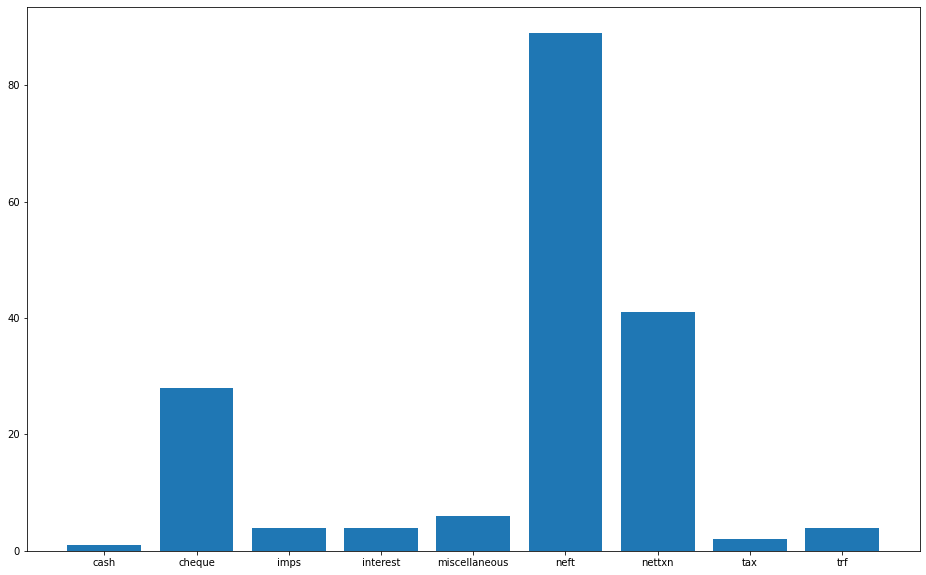

In [236]:
analyse(df)

In [238]:
def analyzer(df):
    labels = df["Type"].unique()
    counts = df.groupby("Type").size()

    plt.figure(figsize=(16, 10))
    plt.bar(counts.index, counts)
    plt.show()

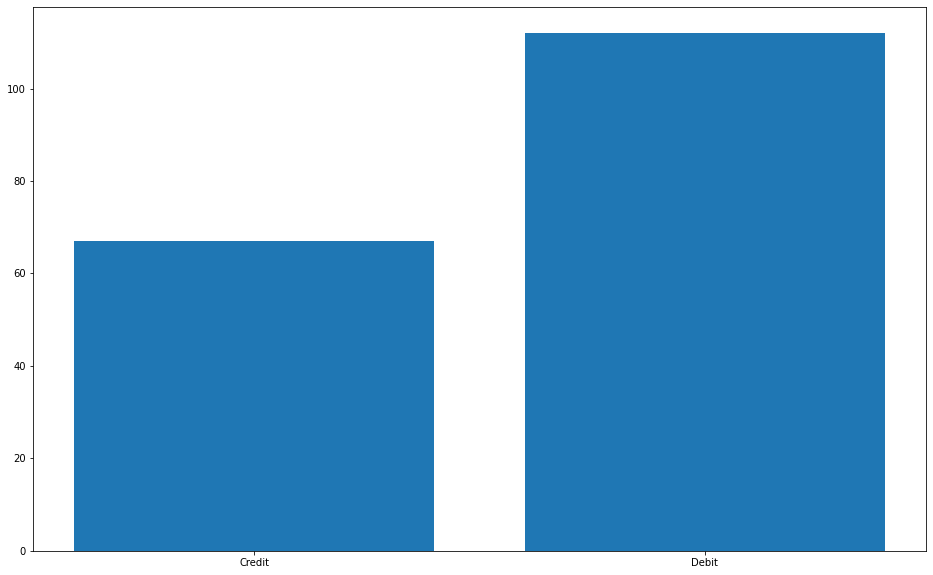

In [239]:
analyzer(df)

In [244]:
df.columns

Index(['Transaction Date', 'Value Date', 'Description', 'Withdrawal',
       'Deposit', 'Balance', 'Label', 'Type'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

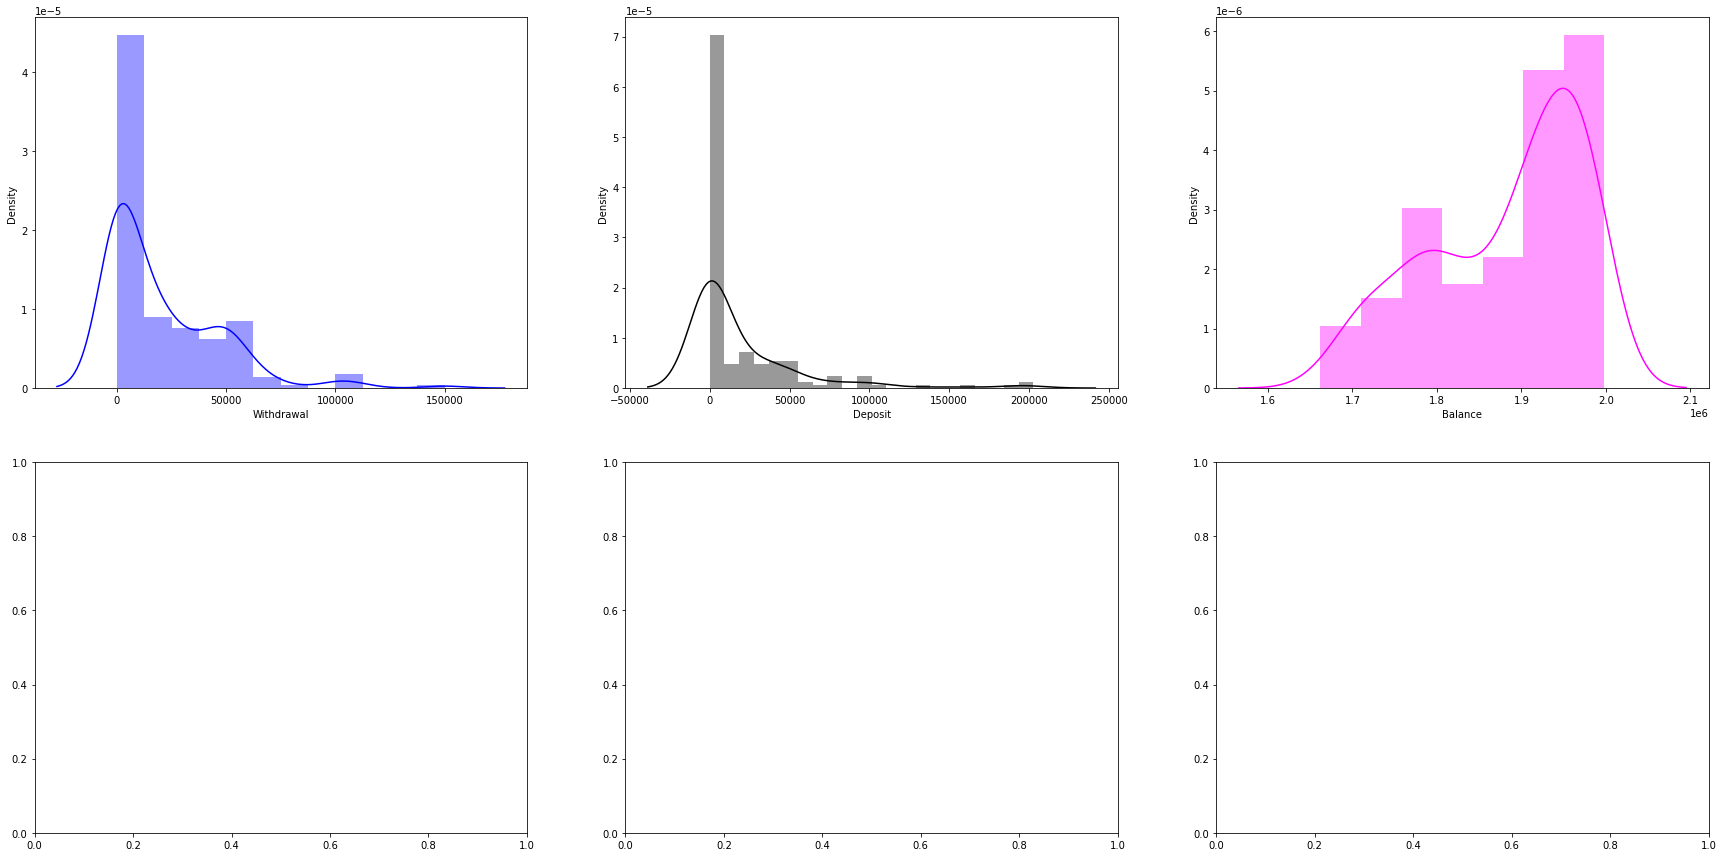

In [249]:
# to check normally distributed or not for the numerical column
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.distplot(df["Withdrawal"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["Deposit"], kde =True, ax=ax[0,1], color = "black")
sns.distplot(df["Balance"], kde =True, ax=ax[0,2], color = "magenta")

In [250]:
df.skew()

Withdrawal    1.754841
Deposit       2.863924
Balance      -0.625568
dtype: float64

Data is little bit skewed. But we dont need to bother. Because we are applying boosting algorithm for this problem.

## FEATURE ENGINEERING

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
le.classes_

array(['cash', 'cheque', 'imps', 'interest', 'miscellaneous', 'neft',
       'nettxn', 'tax', 'trf'], dtype=object)

In [252]:
df.columns

Index(['Transaction Date', 'Value Date', 'Description', 'Withdrawal',
       'Deposit', 'Balance', 'Label', 'Type'],
      dtype='object')

In [253]:
# we extract data from Description. so i am going to drop that feature. 
# And also dropping the date features. if i add the date feature, it will become time series problem and need much more time for that.
df.drop(['Transaction Date', 'Value Date', 'Description'], axis=1, inplace=True)

In [254]:
df['Type'].value_counts()

Debit     112
Credit     67
Name: Type, dtype: int64

In [255]:
z = {'Debit' : 0, 'Credit' : 1}
df['Type'] = df['Type'].map(z)
df.head()

,Withdrawal,Deposit,Balance,Label,Type
0,50000.0,0.0,1798060.46,5,0
1,0.0,10195.0,1787865.46,5,1
2,43362.0,0.0,1831227.46,5,0
3,44781.0,0.0,1876008.46,6,0
4,1947.0,0.0,1877955.46,5,0


## TRAIN TEST SPLIT

In [256]:
x=df.drop(['Type'], axis = 1)
y=df['Type']
x.shape, y.shape

((179, 4), (179,))

In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

##RANDOM FOREST MODEL

In [262]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[23  0]
 [ 0 13]]
accuracy is 1.0


## XGBOOST MODEL

In [264]:
import xgboost
clf = xgboost.XGBClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [265]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[23  0]
 [ 0 13]]
accuracy is 1.0


## Conclusion : Both models give me 100% accuracy with no type 1 error and type 2 error (no false positives and false negatives).